In [64]:
import torch
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from AD.custom_datasets.BTS import *
from AD.custom_datasets.ZTF_sims import *

from AD.custom_datasets.BTS import time_dependent_feature_list as bts_time_dependent_feature_list
from AD.custom_datasets.ZTF_sims import time_dependent_feature_list as ztf_time_dependent_feature_list

In [71]:
grid=4
def plot_light_curve_batch_BTS(batch, lengths, classes, feature_names=bts_time_dependent_feature_list, filter_colors=ZTF_fid_to_wavelengths):
    """
    Plots a batch of light curves (PyTorch version).

    Args:
        batch (torch.Tensor): Tensor of shape (batch_size, sequence_length, n_features)
        lengths (torch.Tensor): Tensor of shape (batch_size,) with valid sequence lengths
        feature_names (list of str): Feature name list, default order: ['time', 'flux', 'flux_err', 'det_flag', 'filter']
        filter_colors (dict): Optional mapping of filter ID to matplotlib color
    """
    batch_np = batch.cpu().numpy()
    lengths_np = lengths.cpu().numpy()

    batch_size = batch_np.shape[0]

    # Get feature indices
    time_idx = feature_names.index('jd')
    flux_idx = feature_names.index('flux')
    flux_err_idx = feature_names.index('flux_err')
    filter_idx = feature_names.index('fid')

    fig, ax = plt.subplots(grid, grid, figsize=(grid*4, grid*4))

    for i in range(batch_size):
        valid_len = int(lengths_np[i])
        light_curve = batch_np[i, :valid_len, :]  # shape: (valid_len, n_features)

        time = light_curve[:, time_idx]
        flux = light_curve[:, flux_idx]
        flux_err = light_curve[:, flux_err_idx]
        filters = light_curve[:, filter_idx] if filter_idx is not None else None

        if filters is not None and filter_colors:
            unique_filters = set(filters)
            for f in unique_filters:
                mask = filters == f
                ax[i//grid][i%grid].errorbar(time[mask], flux[mask], yerr=flux_err[mask],
                            label=f'Filter {int(f)}',
                            color=filter_colors.get(int(f), None), fmt='.')
        else:
            ax[i//4][i%4].errorbar(time, flux, yerr=flux_err, label=f'Curve {i}', alpha=0.7, fmt='.')

        ax[i//grid][i%grid].set_xlabel('Time')
        ax[i//grid][i%grid].set_ylabel('Flux')
        ax[i//grid][i%grid].set_title(f'Light Curve {i}: {classes[i]}')
        ax[i//grid][i%grid].grid()
        ax[i//grid][i%grid].axhline(y=0, c='black', linestyle='dashed')
        if filter_colors:
            ax[i//grid][i%grid].legend()

    plt.tight_layout()
    plt.show()

grid=4
def plot_light_curve_batch_ZTF(batch, lengths, classes, feature_names=ztf_time_dependent_feature_list, filter_colors=ZTF_fid_to_wavelengths):
    """
    Plots a batch of light curves (PyTorch version).

    Args:
        batch (torch.Tensor): Tensor of shape (batch_size, sequence_length, n_features)
        lengths (torch.Tensor): Tensor of shape (batch_size,) with valid sequence lengths
        feature_names (list of str): Feature name list, default order: ['time', 'flux', 'flux_err', 'det_flag', 'filter']
        filter_colors (dict): Optional mapping of filter ID to matplotlib color
    """
    batch_np = batch.cpu().numpy()
    lengths_np = lengths.cpu().numpy()

    batch_size = batch_np.shape[0]

    # Get feature indices
    time_idx = feature_names.index('MJD')
    flux_idx = feature_names.index('FLUXCAL')
    flux_err_idx = feature_names.index('FLUXCALERR')
    filter_idx = feature_names.index('FLT')

    fig, ax = plt.subplots(grid, grid, figsize=(grid*4, grid*4))

    for i in range(batch_size):
        valid_len = int(lengths_np[i])
        light_curve = batch_np[i, :valid_len, :]  # shape: (valid_len, n_features)

        time = light_curve[:, time_idx]
        flux = light_curve[:, flux_idx]
        flux_err = light_curve[:, flux_err_idx]
        filters = light_curve[:, filter_idx] if filter_idx is not None else None

        if filters is not None and filter_colors:
            unique_filters = set(filters)
            for f in unique_filters:
                mask = filters == f
                ax[i//grid][i%grid].errorbar(time[mask], flux[mask], yerr=flux_err[mask],
                            label=f'Filter {int(f)}',
                            color=filter_colors.get(int(f), None), fmt='.')
        else:
            ax[i//4][i%4].errorbar(time, flux, yerr=flux_err, label=f'Curve {i}', alpha=0.7, fmt='.')

        ax[i//grid][i%grid].set_xlabel('Time')
        ax[i//grid][i%grid].set_ylabel('Flux')
        ax[i//grid][i%grid].set_title(f'Light Curve {i}: {classes[i]}')
        ax[i//grid][i%grid].grid()
        ax[i//grid][i%grid].axhline(y=0, c='black', linestyle='dashed')
        if filter_colors:
            ax[i//grid][i%grid].legend()

    plt.tight_layout()
    plt.show()


In [66]:
dataset = BTS_LC_Dataset(BTS_train_parquet_path, max_n_per_class=10)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, collate_fn=custom_collate_BTS)

Loading dataset from /Users/vedshah/Documents/Research/NU-Miller/Projects/Real-Time-AD/data/BTS/train.parquet

Before transforms and mappings, the dataset contains...
          Class  Counts
0           AGN     284
1          AGN?      13
2        AM CVn       3
3        BL Lac       1
4        Blazar       2
5         CLAGN       3
6            CV     590
7           CV?     118
8       Ca-rich       6
9          FBOT       3
10         ILRT       4
11          Ien       1
12          LBV       3
13        LINER       1
14          LRN       3
15         NLS1       3
16       NLSy1?       2
17          QSO      59
18       SLSN-I      75
19     SLSN-I.5       3
20      SLSN-I?       2
21      SLSN-II      19
22        SN II    1106
23     SN II-SL       6
24   SN II-norm      10
25    SN II-pec       2
26       SN II?      19
27       SN IIL       1
28       SN IIP      74
29       SN IIb     109
30   SN IIb-pec       1
31      SN IIb?       4
32       SN IIn     194
33      SN IIn?  

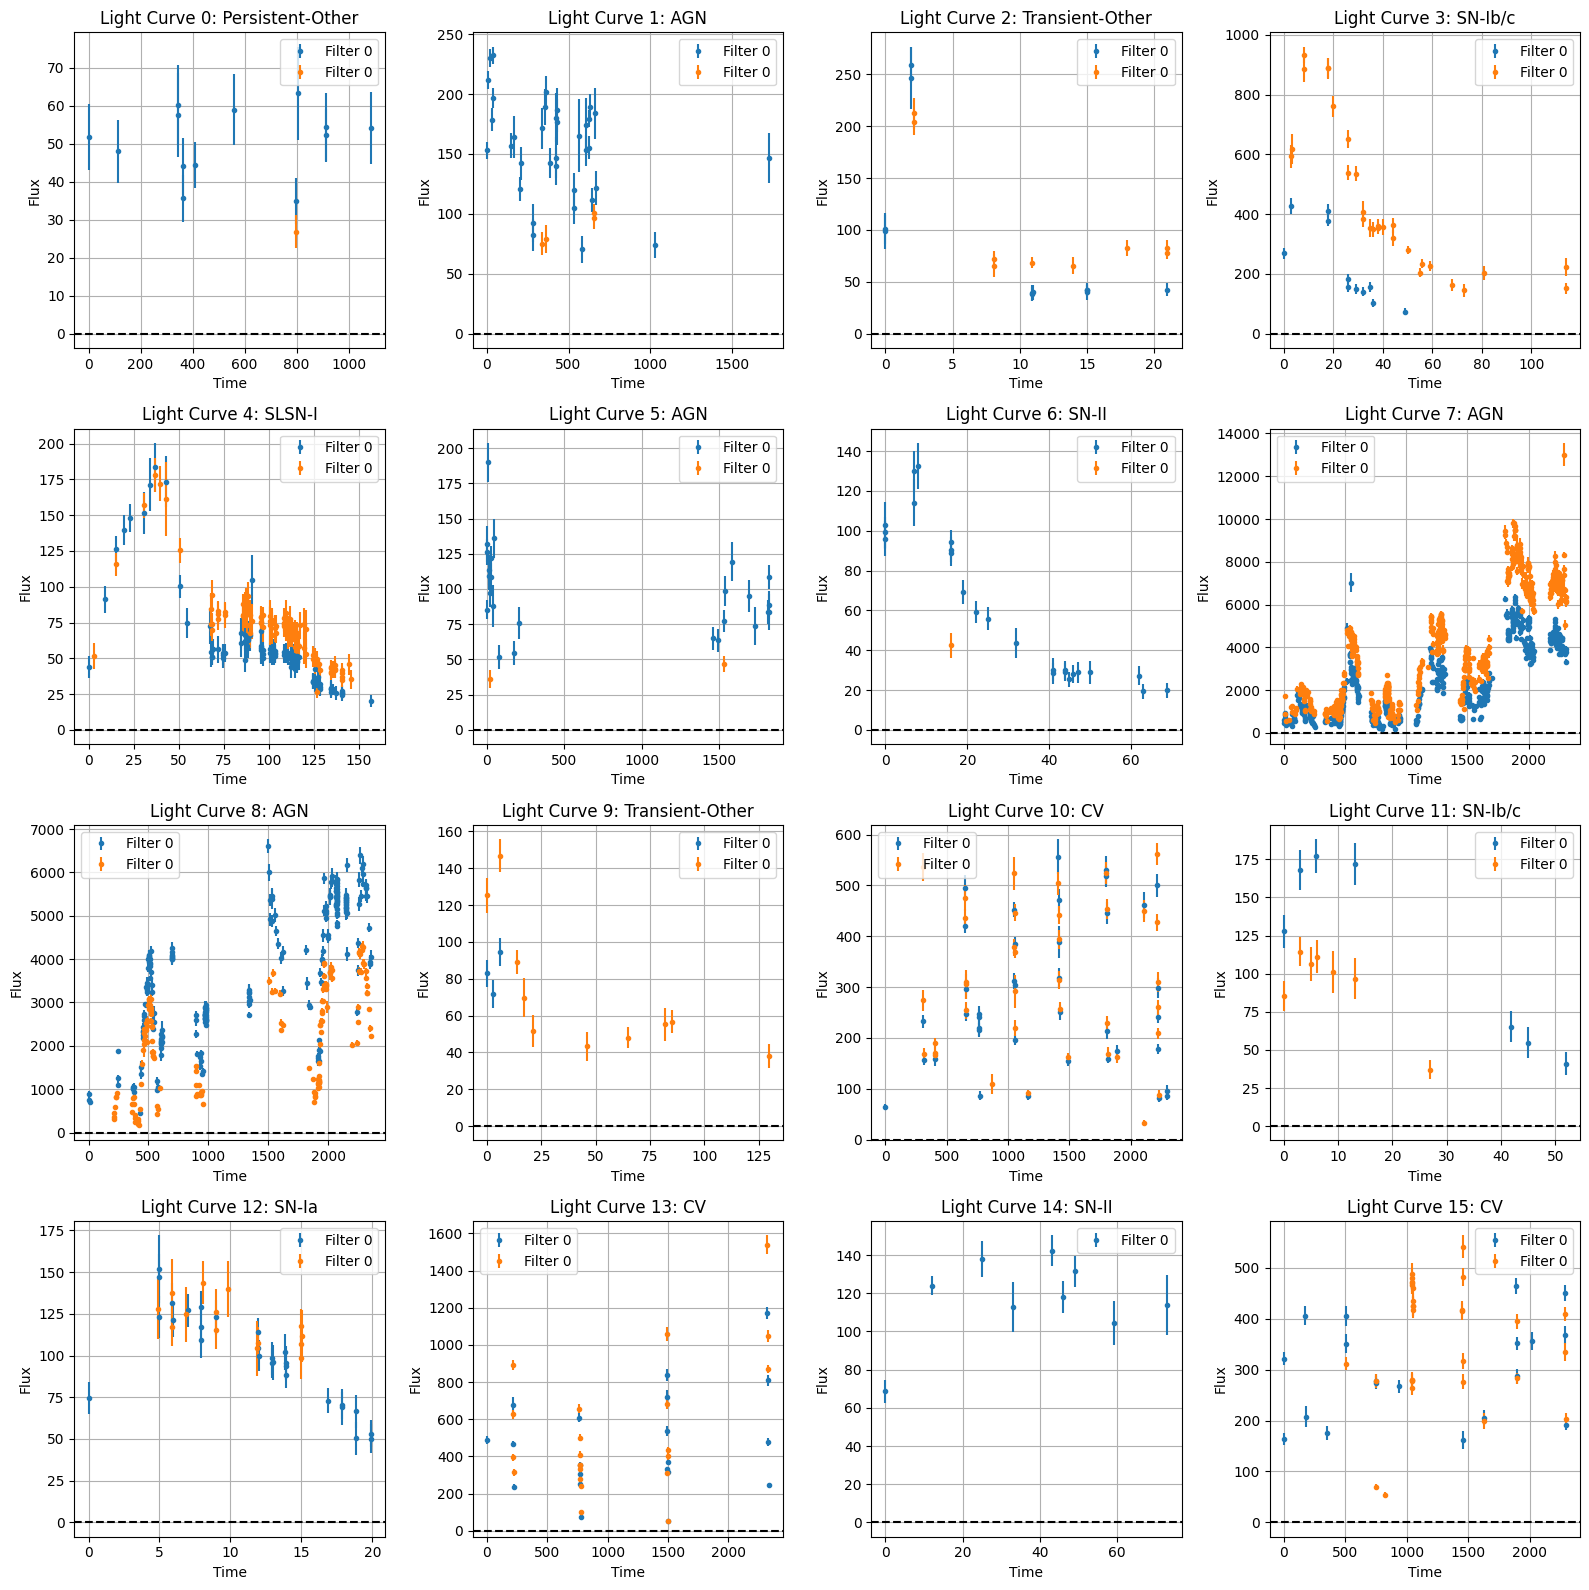

In [67]:
for sample in dataloader:
    plot_light_curve_batch_BTS(sample['ts'], sample['length'], sample['label'])
    break

In [68]:
dataset = ZTF_SIM_LC_Dataset(ZTF_sim_train_parquet_path, max_n_per_class=10)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, collate_fn=custom_collate_ZTF_SIM)

Loading dataset from /Users/vedshah/Documents/Research/NU-Miller/Projects/Real-Time-AD/data/ZTF_sims/train.parquet

Before transforms and mappings, the dataset contains...
       Class  Counts
         AGN    3216
        CART    3294
         EBE    1624
        ILOT     345
          KN    1263
        PISN    5773
      SLSN-I    1622
     SNCC-II    2517
    SNCC-Ibc    3848
   SNIa-91bg    2886
 SNIa-normal    3754
     SNIa-x     2687
         TDE    3080
uLens-Binary    2213
Starting Dataset Transformations:
Replacing band labels with mean wavelengths...
Dropping saturations from MJD series...
Dropping saturations from FLUXCAL series...
Dropping saturations from FLUXCALERR series...
Dropping saturations from FLT series...
Removing saturations from PHOTFLAG series...
Replacing PHOTFLAG bitmask with binary values...
Subtracting time of first observation...
Mapping ZTF sim classes to astrophysical classes...
Replacing missing values in MWEBV series...
Replacing missing values in MW

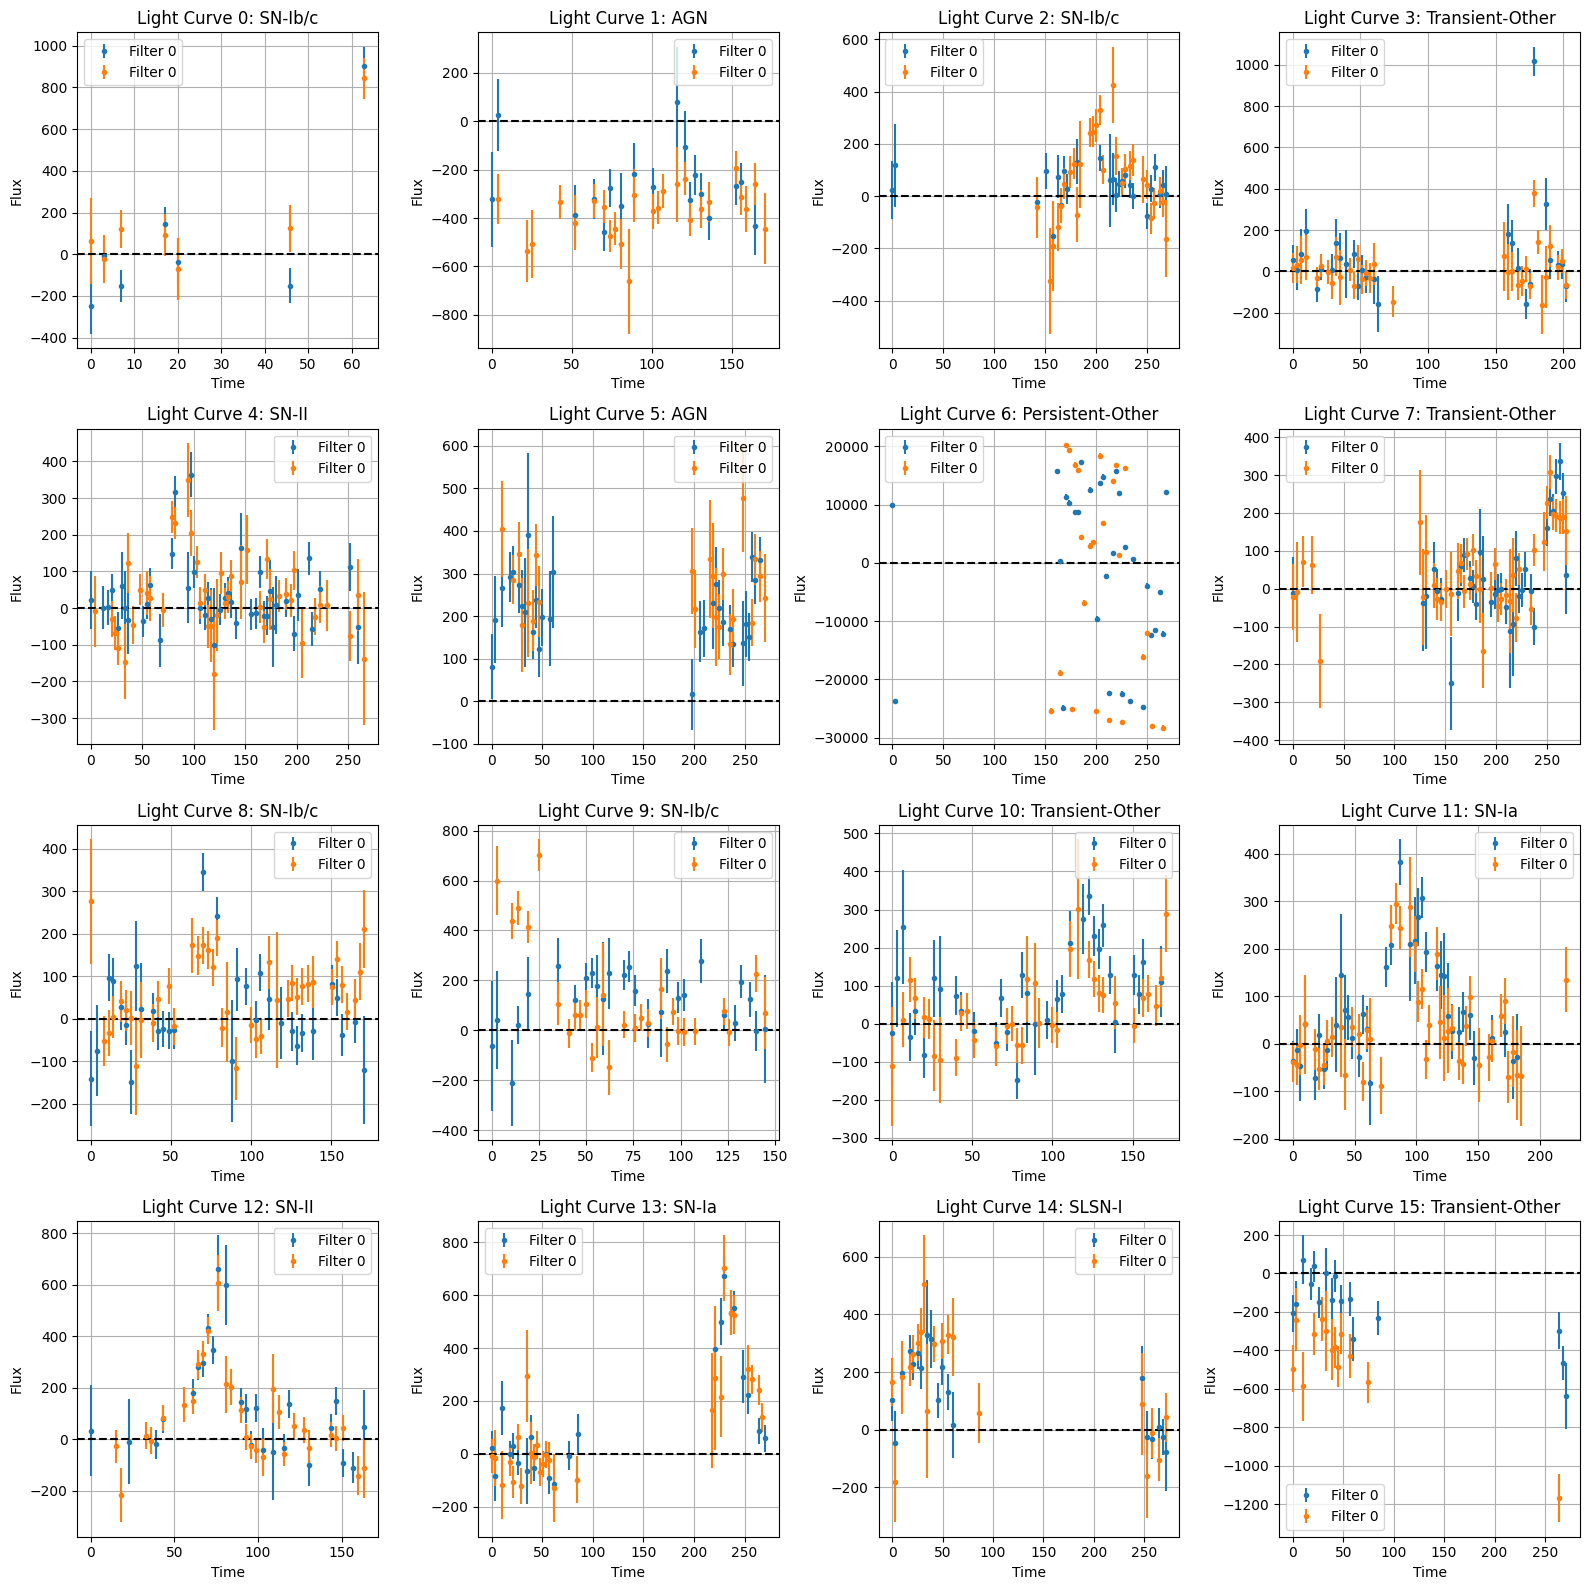

In [72]:
for sample in dataloader:
    plot_light_curve_batch_ZTF(sample['ts'], sample['length'], sample['label'], feature_names=ztf_time_dependent_feature_list)
    break